In [30]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import Image, display
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

os.getcwd()
#getting the current working directory

'C:\\Users\\Mukul\\Desktop\\fruad detection project\\course code'

In [31]:
data = pd.read_csv("Fraud.csv")

In [32]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# shuffling the dataset 

In [33]:
data = data.sample(frac = 1)

In [34]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
930833,43,TRANSFER,312199.16,C1877216334,10274.41,0.0,C1666318516,4577199.15,4889398.32,0,0
6207086,587,PAYMENT,5606.36,C1127964471,0.00,0.0,M1076513126,0.00,0.00,0,0
1429176,139,CASH_OUT,19969.74,C1160812952,0.00,0.0,C2011214802,50138.41,70108.15,0,0
5718184,398,CASH_OUT,120049.63,C357696061,0.00,0.0,C648981376,137959.94,258009.57,0,0
1708289,160,CASH_OUT,202731.67,C651280973,100272.00,0.0,C1649508835,2369093.25,2571824.92,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4483302,324,CASH_OUT,186801.13,C897701461,1045.00,0.0,C759201994,852783.82,1039584.94,0,0
2231785,186,CASH_OUT,133305.27,C1234536963,0.00,0.0,C1644368429,1410172.62,1932479.24,0,0
2109818,183,CASH_OUT,283181.01,C279910514,0.00,0.0,C282673740,1427090.93,1710271.95,0,0
4780450,335,TRANSFER,1884580.08,C1978718592,9740.08,0.0,C239822128,3417791.57,5302371.64,0,0


In [35]:
df_300000 = data.head(3000000)

In [36]:
df = df_300000

In [37]:
(df["isFraud"] == 1).sum()

3893

In [38]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
930833,43,TRANSFER,312199.16,C1877216334,10274.41,0.0,C1666318516,4577199.15,4889398.32,0,0
6207086,587,PAYMENT,5606.36,C1127964471,0.00,0.0,M1076513126,0.00,0.00,0,0
1429176,139,CASH_OUT,19969.74,C1160812952,0.00,0.0,C2011214802,50138.41,70108.15,0,0
5718184,398,CASH_OUT,120049.63,C357696061,0.00,0.0,C648981376,137959.94,258009.57,0,0
1708289,160,CASH_OUT,202731.67,C651280973,100272.00,0.0,C1649508835,2369093.25,2571824.92,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3208567,249,PAYMENT,29348.37,C42340631,0.00,0.0,M99527666,0.00,0.00,0,0
1691588,159,CASH_OUT,206508.59,C2038271897,0.00,0.0,C17820769,5875208.80,6081717.39,0,0
5128005,356,PAYMENT,10249.26,C1159208719,0.00,0.0,M343652502,0.00,0.00,0,0
3288153,252,CASH_OUT,228054.30,C745465943,0.00,0.0,C1780318744,299659.98,514938.24,0,0


In [39]:
df["numeric_nameOrig"] = df['nameOrig'].apply(lambda x: int(hashlib.sha256(x.encode()).hexdigest(), 16))

C:\Users\Mukul\AppData\Local\Temp\ipykernel_16524\2813479891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["numeric_nameOrig"] = df['nameOrig'].apply(lambda x: int(hashlib.sha256(x.encode()).hexdigest(), 16))


In [40]:
df.drop('nameOrig', axis=1, inplace=True)

C:\Users\Mukul\AppData\Local\Temp\ipykernel_16524\2578813221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('nameOrig', axis=1, inplace=True)


In [41]:
df["numeric_nameDest"] = df['nameDest'].apply(lambda x: int(hashlib.sha256(x.encode()).hexdigest(), 16))

C:\Users\Mukul\AppData\Local\Temp\ipykernel_16524\1067986028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["numeric_nameDest"] = df['nameDest'].apply(lambda x: int(hashlib.sha256(x.encode()).hexdigest(), 16))


In [42]:
df.drop("nameDest",axis=1,inplace = True)

C:\Users\Mukul\AppData\Local\Temp\ipykernel_16524\2617844302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("nameDest",axis=1,inplace = True)


In [43]:
df['type'] = df['type'].map({"CASH_OUT": 0,"PAYMENT":1,"CASH_IN":2,"TRANSFER":3,"DEBIT":4})

C:\Users\Mukul\AppData\Local\Temp\ipykernel_16524\2174955255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].map({"CASH_OUT": 0,"PAYMENT":1,"CASH_IN":2,"TRANSFER":3,"DEBIT":4})


In [44]:
df.drop("step",axis=1,inplace = True)

C:\Users\Mukul\AppData\Local\Temp\ipykernel_16524\1496370785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("step",axis=1,inplace = True)


In [45]:
df.drop("isFlaggedFraud",axis=1,inplace = True)

C:\Users\Mukul\AppData\Local\Temp\ipykernel_16524\3507099857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("isFlaggedFraud",axis=1,inplace = True)


In [46]:
test = df[df["isFraud"]==1]

In [47]:
test.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'numeric_nameOrig', 'numeric_nameDest'],
      dtype='object')

In [48]:
data['type'] = data['type'].map({"CASH_OUT": 0,"PAYMENT":1,"CASH_IN":2,"TRANSFER":3,"DEBIT":4})

In [56]:
test = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud']].head(10000)

In [50]:
open_values = test
t = list(open_values.columns)
lis = []
for i in t:
    lis.append(open_values[i].mean())
print(open_values.shape)
print(len(lis))

(10000, 7)
7


In [51]:
subtracted = open_values.iloc[:, 0:].sub(lis, axis=1)
test = subtracted

In [59]:
test

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
930833,3,312199.16,10274.41,0.00,4577199.15,4889398.32,0
6207086,1,5606.36,0.00,0.00,0.00,0.00,0
1429176,0,19969.74,0.00,0.00,50138.41,70108.15,0
5718184,0,120049.63,0.00,0.00,137959.94,258009.57,0
1708289,0,202731.67,100272.00,0.00,2369093.25,2571824.92,0
...,...,...,...,...,...,...,...
2407026,1,14251.32,369892.23,355640.91,0.00,0.00,0
260807,0,390526.36,10080.00,0.00,0.00,522001.29,0
5993148,0,31465.55,0.00,0.00,37912.44,69377.98,0
872132,0,268920.14,10365.00,0.00,904569.73,1173489.87,0


In [60]:
test["orig"] = test["oldbalanceOrg"] - test["newbalanceOrig"]

In [61]:
test["Dest"] = test["newbalanceDest"] - test["oldbalanceDest"]

In [64]:
test.drop("oldbalanceOrg",axis=1,inplace = True)
test.drop("newbalanceOrig",axis=1,inplace = True)
test.drop("newbalanceDest",axis=1,inplace = True)
test.drop("oldbalanceDest",axis=1,inplace = True)

In [66]:
x_observed = test["orig"].values
y_observed = test["amount"].values
z_observed = test["Dest"].values

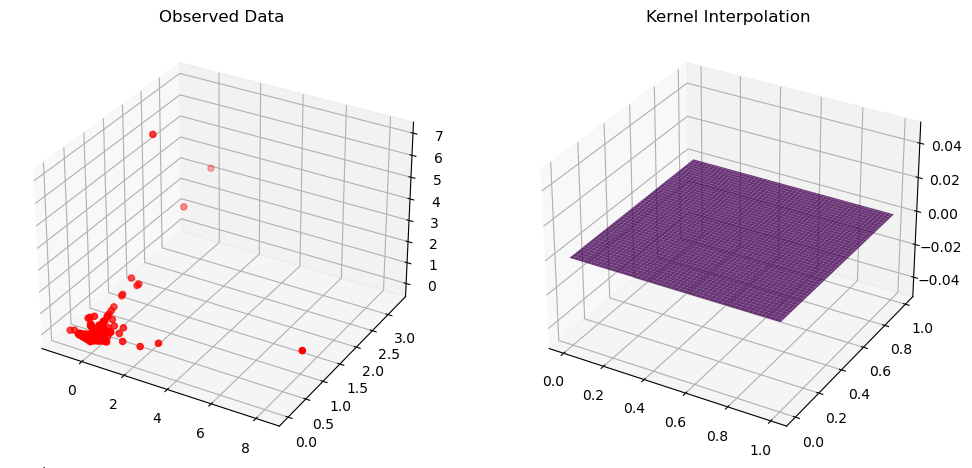

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
x_observed = test["orig"].values
y_observed = test["amount"].values
z_observed = test["Dest"].values

def kernel_function(x, y, sigma=0.1):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)

# Interpolation grid
x_interpolation = np.linspace(0, 1, 100)
y_interpolation = np.linspace(0, 1, 100)
X_interpolation, Y_interpolation = np.meshgrid(x_interpolation, y_interpolation)
Z_interpolation = np.zeros_like(X_interpolation)
for x_obs, y_obs, z_obs in zip(x_observed, y_observed, z_observed):
    Z_interpolation += z_obs * kernel_function(X_interpolation - x_obs, Y_interpolation - y_obs)
Z_interpolation /= len(x_observed)
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_observed, y_observed, z_observed, c='r', marker='o', label='Observed Data')
ax1.set_title('Observed Data')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_interpolation, Y_interpolation, Z_interpolation, cmap='viridis', alpha=0.8)
ax2.set_title('Kernel Interpolation')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Sample data (replace this with your actual data)
np.random.seed(42)
n_samples = 100
x_observed = np.random.rand(n_samples)
y_observed = np.random.rand(n_samples)
z_observed = np.random.rand(n_samples)
w_observed = np.random.rand(n_samples)

# Define the kernel function
def kernel_function(x, y, z, w, sigma=0.1):
    return np.exp(-(x**2 + y**2 + z**2 + w**2) / (2 * sigma**2)) / ((2 * np.pi)**2 * sigma**2)

# Interpolation grid
x_interpolation = np.linspace(0, 1, 100)
y_interpolation = np.linspace(0, 1, 100)
z_interpolation = np.linspace(0, 1, 100)
w_interpolation = np.linspace(0, 1, 100)

X_interpolation, Y_interpolation, Z_interpolation, W_interpolation = np.meshgrid(
    x_interpolation, y_interpolation, z_interpolation, w_interpolation
)

# Perform kernel interpolation
data_points = zip(x_observed, y_observed, z_observed, w_observed)
Z_interpolation_sum = np.zeros_like(X_interpolation)

for x_obs, y_obs, z_obs, w_obs in data_points:
    Z_interpolation_sum += kernel_function(
        X_interpolation - x_obs,
        Y_interpolation - y_obs,
        Z_interpolation - z_obs,
        W_interpolation - w_obs
    )

Z_interpolation = Z_interpolation_sum / len(x_observed)

# Plotting
fig = plt.figure(figsize=(16, 8))

# Observed Data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x_observed, y_observed, z_observed, c='r', marker='o', label='Observed Data')
ax1.set_title('Observed Data')

# Kernel Interpolation
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_interpolation, Y_interpolation, Z_interpolation[:, :, 0, 0], cmap='viridis', alpha=0.8)
ax2.set_title('Kernel Interpolation')

plt.show()


linear interpolation lagrange interpolation, cubic spline interpolation, nearest neighbour interpolation, bilinear interpolation, kriging interpolation.
	
	

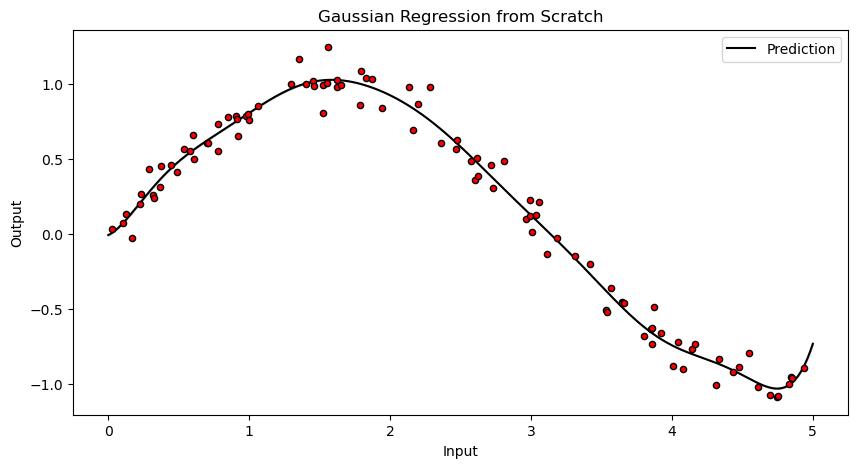

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def kernel(x1, x2, l=1.0, sigma_f=1.0):
    """
    Squared Exponential (SE) kernel function.
    """
    dist = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * dist)

class GaussianProcessRegressor:
    def __init__(self, kernel, alpha=1e-6):
        self.kernel = kernel
        self.alpha = alpha
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        K = self.kernel(self.X_train, self.X_train)
        K_s = self.kernel(self.X_train, X_test)
        K_ss = self.kernel(X_test, X_test)

        # Add a small diagonal to the covariance matrix for numerical stability
        K += self.alpha * np.eye(len(self.X_train))

        # Calculate mean and covariance of the posterior distribution
        L = np.linalg.cholesky(K)
        Lk = np.linalg.solve(L, K_s)
        mu_s = np.dot(Lk.T, np.linalg.solve(L, self.y_train))

        # Calculate standard deviation at test points
        s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
        sigma = np.sqrt(np.maximum(s2, 0))

        return mu_s, sigma

# Generate some sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)

# Create GaussianProcessRegressor
gp = GaussianProcessRegressor(kernel)

# Fit the model to the data
gp.fit(X, y)

# Make predictions on test data
X_test = np.linspace(0, 5, 1000)[:, np.newaxis]
y_pred, sigma = gp.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='r', s=20, zorder=10, edgecolors=(0, 0, 0))
plt.plot(X_test, y_pred, 'k', label='Prediction')
plt.fill_between(X_test.ravel(), y_pred - sigma, y_pred + sigma, alpha=0.2, color='k')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Gaussian Regression from Scratch')
plt.legend()
plt.show()


Center: [-0.10295661 -0.0168736  -0.05841267 -0.09427399  0.14574467]
Semi-Axes Lengths: [1.10045948 1.07680299 1.02306611 0.90479249 0.86858873]
Principal Axes (Columns of Eigenvectors): [[-0.24466321  0.6922949   0.3108332  -0.60200122 -0.04295265]
 [ 0.41943705  0.11978841 -0.52219593 -0.25327285 -0.68766822]
 [ 0.08097075 -0.57554894  0.62150877 -0.34565713 -0.39551885]
 [ 0.63040665  0.39485936  0.48404277  0.4536074  -0.08134173]
 [ 0.60020303 -0.138593   -0.10061602 -0.49820565  0.60184371]]


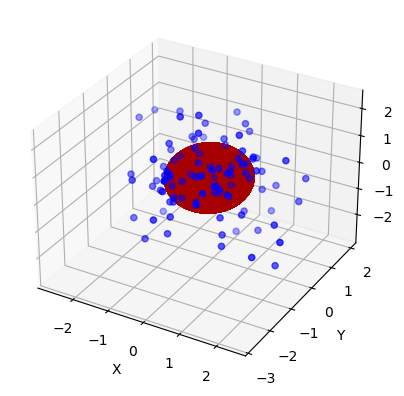

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fit_hyperellipsoid(points):
    covariance_matrix = np.cov(points, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]
    center = np.mean(points, axis=0)
    semi_axes_lengths = np.sqrt(eigenvalues)

    return center, semi_axes_lengths, eigenvectors
def plot_hyperellipsoid(center, semi_axes_lengths, eigenvectors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', label='Points')

    # Plot hyperellipsoid
    phi = np.linspace(0, 2 * np.pi, 100)
    theta = np.linspace(0, np.pi, 50)
    phi, theta = np.meshgrid(phi, theta)

    x = center[0] + semi_axes_lengths[0] * np.outer(np.cos(phi), np.sin(theta))
    y = center[1] + semi_axes_lengths[1] * np.outer(np.sin(phi), np.sin(theta))
    z = center[2] + semi_axes_lengths[2] * np.outer(np.ones_like(phi), np.cos(theta))

    ax.plot_surface(x, y, z, color='r', alpha=0.2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
np.random.seed(0)
points = np.random.randn(100, 5)  # Replace with your actual 5D points

center, semi_axes_lengths, eigenvectors = fit_hyperellipsoid(points)
print("Center:", center)
print("Semi-Axes Lengths:", semi_axes_lengths)
print("Principal Axes (Columns of Eigenvectors):", eigenvectors)

plot_hyperellipsoid(center, semi_axes_lengths, eigenvectors)


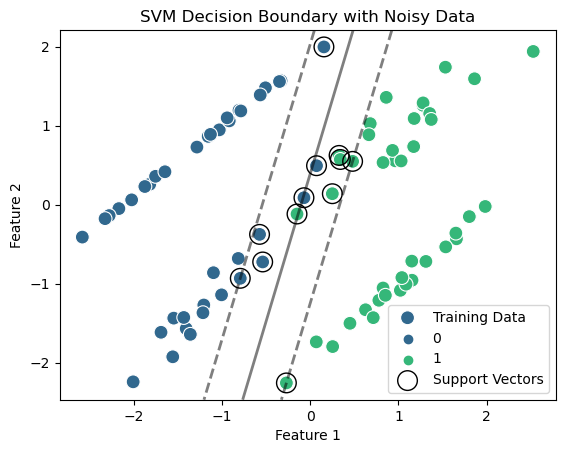

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data with added noise
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model with a linear kernel
model = SVC(kernel='linear')

# Fit the model
model.fit(X_train, y_train)

# Plot the training data
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='viridis', marker='o', s=100, label='Training Data')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], linewidths=[2, 2, 2])

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Noisy Data')

# Show the plot
plt.legend()
plt.show()
